# GoogLeNet
* Esta es la primera red no secuencial que vamos a aprender.
* Tambien gano en el 2014 y se publico en el 2015
* Los autores son Szedgedy, et. al., de Google Inc.
* Se define por bloques que vamos a explicar a continuacion
* La GoogLeNet se construye con unos bloques a cuales se le llaman **inception**. Ejemplos, de esos bloques se muestran a continuacion.

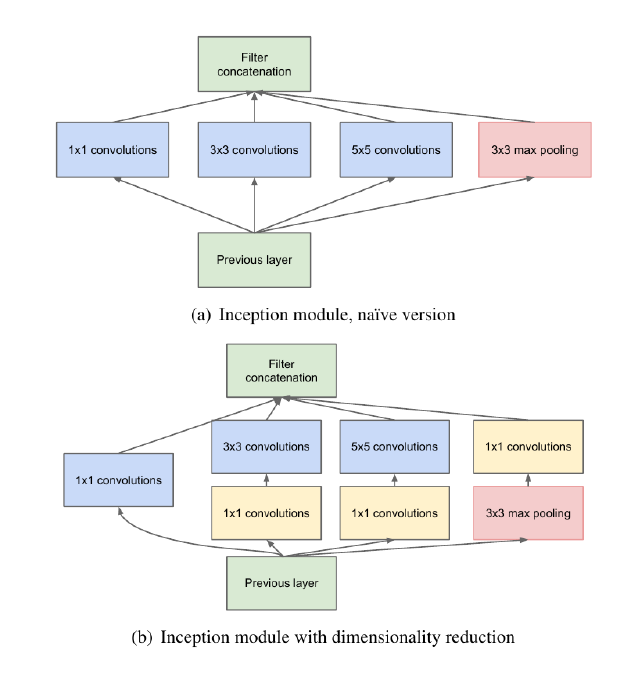

Que significa una convolucion $1 \times 1$ y que vantajas tiene.


* La convolucion $1 \times 1$ puede colapsar la dimension de la profundad.
Por decir algo, si la profundidad es $3$, (RGB), una convolucion con un filtro $1 \times 1 \times 3$ convierte una imagen in pixeles $nx \times ny \times 3$ en $nx  \times ny$. 

* Mas generalmente, suponga los coeficientes del filtro (tensor de rango 3) $f_{ijk}$ aplicados a la imagen $i_{ijl}$, La salida es de la forma
$$ \text{out}_{ij} = \sum_{l=1}^k f_{ijl}  \text{in}_{ijl} $$. Se pierde la profundidad ($l$) . En este sentido se puede ver la convolucion con filtros del tipo $1 \times 1$ como una "promedio" a lo largo de la profundidad.

* Pensamos, aun mas generalmente, en un numero filtros de salida $p$, tenemos el tensor de rango 4 $f_{ijl}^{p}$, En este caso#

$$\text{out}_{ij}^p = \sum_{l=1}^k f_{ijl}^p \quad , i=1,2, \cdots, ancho \quad , \quad j=1,2, , alto \quad , \quad p=1,2, \cdots, profundidad $$

* Parametros (thetas).
$$ \# \text{parameters} = (1 \times 1 \times \text{depth} + 1) \times nf $$
Las ganancias son muchas por que en vez de $nx \times ny$  se tienen $1 \times 1$. Por ejemplo si $nx=ny=5$, en vez de 25 veces el numero de parametros tenemos 1 vez. 

*  **Un ejemplo concreto** :  Pensemos en el conjunto de las Flowers/17. Alli cada imagen tiene un tamano $224 \times 224 \times 3$. Queremos una salida con 256 filtros. Miremos dos opciones:     
    * Usar el filtro $5 \times 5 \times 3$. El numero de multiplicaciones es
    $$ 5 \times 5 \times 224 \times 224  \times 3 \times 256 =963379200  $$

    * Otra opcion: Usar $1 \times 1$ para reducir el tamano de la salida y luego con un tamano de salida mas pequeno construir los 256 filtros que queremos. Esto lo hace el modelo de reduccion de parametros del inception. Hagamos los calculos en 2 fases, $1 \times 1$ con un filtro de salida, luego $5 \times 5$ con $256$ filtros de salida. El numero de multiplicaciones esta dado por:     

    $$ 1 \times 1 \times 224 \times 224 \times 3 \times 1 + 5 \times 5 \times 224 \times 224 \times 1 \times 256 =  321276928 $$
Esto significa un ahorro del 66%.

## Un poco de historia🇰

* La primera forma del inception v1 (version 1) se publico en 2014 tambien conocida como GoogLeNet Inception
* Luego se desarrollo la forma Inception v2 y la Inception v3.
* La inception v4 y ResNet se introduceron.
* Finalmente se desarrollo la Xception. 

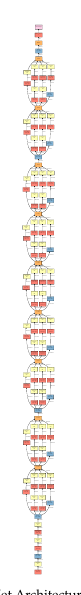

In [ ]:
# implementemos un bloque (inception)

def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    conv1 = Conv2D( f1, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
    pool = MaxPool2D( (3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1) , padding='same', activation='relu')(pool)

    # se concatenan todos
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out


## Paginas en la web importantes para la implementacion de inception

[Dibujos de redes](https://josephpcohen.com/w/visualizing-cnn-architectures-side-by-side-with-mxnet/)

[Implemantacion del Inception en GIT](https://gist.github.com/joelouismarino/a2ede9ab3928f999575423b9887abd14)


[Implementacion del Inception por Jason Brownlee. Machine Learning Matery page](https://gist.github.com/joelouismarino/a2ede9ab3928f999575423b9887abd14)